<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/myKNNclassCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
df=pd.read_csv('Q1Data.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_9   7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [7]:
df = df.iloc[:, :-3].join(df.iloc[:, -2])
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Scinax
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Scinax
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Scinax
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Scinax


In [8]:
encoder= LabelEncoder()
df['Genus']=encoder.fit_transform(df['Genus'])
print(df)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [9]:
scaler=StandardScaler()

In [10]:
X=df.iloc[:,0:21].values
X=scaler.fit_transform(X)
X.shape

(7195, 21)

In [11]:
y=df.iloc[:,-1].values

y.shape

(7195,)

In [12]:
class KNN:
  def __init__(self,k):
    self.n_neighbors=k
    self.X_train=None
    self.y_train=None

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self,X_test):
    y_pred=[]
    for i in X_test:
      distances =[]
      for j in self.X_train:
        distances.append(self.calculate_distance(i,j))
      n_neighbors=sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]
      label = self.majority_count(n_neighbors)
      y_pred.append(label)
    return np.array(y_pred)

  def calculate_distance(self,point_A,point_B):
    return np.linalg.norm(point_A - point_B)
  def majority_count(self,neighbors):
    votes=[]
    for i in neighbors:
      votes.append(self.y_train[i[0]])
    votes = Counter(votes)
    return votes.most_common()[0][0]




In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [39]:
#X_train,y_train=train_test_split(df,test_size=0.3,random_state=0)

In [13]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=0)




In [14]:

X_train, _, y_train, _ = train_test_split(X_temp, y_temp, test_size=1/3, random_state=0)

In [15]:
k_values=list(range(1,51))
accuracies=[]
for k_value in k_values:
  apnaKnn= KNN(k=k_value)
  apnaKnn.fit(X_train,y_train)
  y_pred=apnaKnn.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  accuracies.append(accuracy)

In [16]:
print(accuracies)

[0.9902777777777778, 0.9902777777777778, 0.9875, 0.9902777777777778, 0.9888888888888889, 0.9902777777777778, 0.9888888888888889, 0.9888888888888889, 0.9833333333333333, 0.9861111111111112, 0.9833333333333333, 0.9819444444444444, 0.9791666666666666, 0.9777777777777777, 0.9763888888888889, 0.9763888888888889, 0.9763888888888889, 0.975, 0.9763888888888889, 0.975, 0.9722222222222222, 0.9694444444444444, 0.9666666666666667, 0.9652777777777778, 0.9638888888888889, 0.9652777777777778, 0.9638888888888889, 0.9638888888888889, 0.9652777777777778, 0.9611111111111111, 0.9611111111111111, 0.9611111111111111, 0.9597222222222223, 0.9597222222222223, 0.9569444444444445, 0.9569444444444445, 0.9583333333333334, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9527777777777777, 0.9513888888888888, 0.95, 0.9513888888888888, 0.95, 0.9486111111111111, 0.95, 0.9486111111111111]


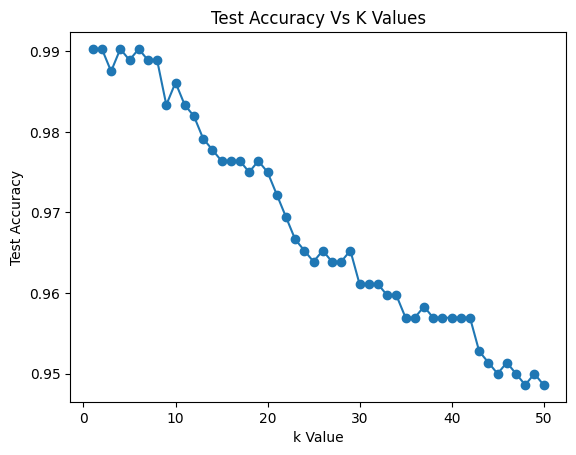

In [18]:
plt.plot(k_values, accuracies,marker='o')
plt.title('Test Accuracy Vs K Values')
plt.xlabel('k Value')
plt.ylabel('Test Accuracy')
plt.show()